# RESİMDEN YÜZ TESPİTİ

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
test_img=cv2.imread("indir.jpg")
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [5]:
gray=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)

In [6]:
faces=face_cascade.detectMultiScale(gray,1.3,3) #x,y,w,h

In [7]:
for (x,y,w,h) in faces: 
    cv2.rectangle(test_img, (x,y), (x+w,y+h), (0,0,255), 4)

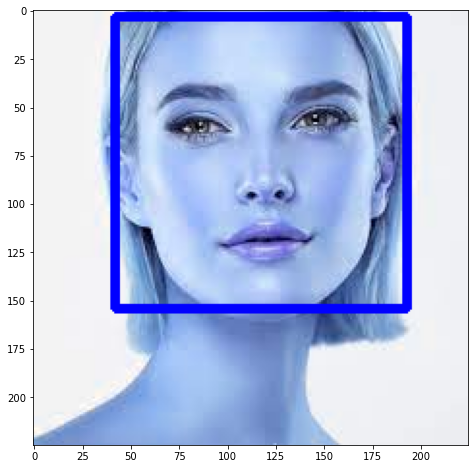

In [8]:
plt.figure(figsize=(12,8))
plt.imshow(test_img)
plt.show()

# GERCEK ZAMANLI YUZ TESPİTİ

In [7]:
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame,1)
    if ret==False:
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 2) # x,y,w,h
    
    for (x,y,w,h) in faces: 
        
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 4)    
    
    cv2.imshow("Detected Faces", frame)
    
    if cv2.waitKey(30) & 0xFF == ord("q"):
        break
    
cap.release()
cv2.destroyAllWindows()

# RENK TESPİTİ

In [1]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # green
    lower_green = np.array([45, 100, 50])
    upper_green = np.array([75, 255, 255])
    green_mask = cv2.inRange(hsv_frame, lower_green, upper_green)
    green = cv2.bitwise_and(frame, frame, mask = green_mask)
    # blue
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv_frame, lower_blue, upper_blue)
    blue = cv2.bitwise_and(frame, frame, mask = blue_mask)
    cv2.imshow("Webcam", frame)
    cv2.imshow("Green Mask", green_mask)
    #cv2.imshow("Blue", blue)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

# TRACKBAR

In [2]:
#OpenCV penceresinde istediğimiz renkleri görme

def nothing(x): # bos fonksyon
  pass
img = np.zeros((512,512,3),np.uint8)
cv2.namedWindow("image")
cv2.createTrackbar("R", 'image', 0, 255, nothing) 
cv2.createTrackbar("G", 'image', 0, 255, nothing)
cv2.createTrackbar("B", 'image', 0, 255, nothing)
cv2.createTrackbar("Switch", 'image', 0, 1, nothing)


while(1):
    cv2.imshow("image", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
    s=cv2.getTrackbarPos("Switch","image")
    r = cv2.getTrackbarPos("R", "image")
    g = cv2.getTrackbarPos("G", "image")
    b = cv2.getTrackbarPos("B", "image")
    if s==1:
        img[:] = [b,g,r]
    else:
        img[:]=[0,0,0]
cv2.destroyAllWindows()

# ÇİZİM FONKSİYONU

In [3]:
canvas = np.zeros((512,512,3), dtype = np.uint8) + 255    # CANVAS İÇİNİ BEYAZ YAPMAK İÇİN 255 EKLİYORUZ

#cv2.line(canvas,(0,0),(512,512),(255,0,0),4)
#cv2.rectangle(canvas,(150,150),(320,320),(0,255,0),-1)
#cv2.circle(canvas,(150,150),50,(0,0,255),-1)

font=cv2.FONT_HERSHEY_TRIPLEX
cv2.putText(canvas,"openCv",(10,100),font,4,(245,158,66),4,cv2.LINE_AA)  # ekrana yazı yazdırıyoruz 


cv2.imshow("canvas",canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

# VİDEO KAYDI ALMA

In [38]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
fileName = "GoruntuIsleme.avi"
codec = cv2.VideoWriter_fourcc('W', 'M', 'V', '2')
frameRate = 30
resolution = (640, 480)
videoFileOutput = cv2.VideoWriter(fileName,codec,frameRate,resolution)
while True:
   ret, frame = cap.read()
   videoFileOutput.write(frame)
   cv2.imshow("windowName", frame)
   if cv2.waitKey(1) == 27:
      break
cv2.destroyAllWindows()
videoFileOutput.release()
cap.release()